In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
airbnb_df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Data\airbnb_listings_austin.csv")
airbnb_df.head()

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,NaN,Unfortunately there is no convenient public tr...,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,NaN,"Bike, Bus, Metrorail, etc. you name it we've g...",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict


In [23]:
airbnb_df.dtypes

id                               int64
listing_url                     object
name                            object
summary                         object
space                           object
description                     object
experiences_offered             object
neighborhood_overview           object
notes                           object
transit                         object
host_id                          int64
host_name                       object
host_since                      object
host_location                   object
host_about                      object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_listings_count            float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
city                            object
property_type                   object
room_type                       object
accommodates             

In [24]:
def percentage_missing(df):
    return df.isna().sum() / len(df) * 100

In [25]:
airbnb_df = airbnb_df.drop(columns=['id', 'listing_url', 'name', 'summary', 'space', 'description', 'experiences_offered', 
                                    'neighborhood_overview', 'notes', 'transit', 'host_name', 'host_since', 'host_location', 
                                    'host_about', 'host_response_time', 'host_response_rate', 'neighbourhood', 'city', 
                                    'property_type', 'room_type', 'bed_type', 'amenities', 'review_scores_accuracy',
                                    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                                    'review_scores_location', 'review_scores_value', 'cancellation_policy', 'host_id'])
airbnb_df.head()



,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,f,1.0,t,f,6,2.5,1.0,3.0,3600.0,$300.00,...,$0.00,2,t,0,0,0,240,1,100.0,f
1,f,1.0,t,t,2,0.0,1.0,1.0,NaN,$99.00,...,$0.00,3,t,29,59,89,364,0,NaN,f
2,f,2.0,t,t,2,1.5,1.0,1.0,NaN,$100.00,...,$0.00,1,t,30,60,90,365,0,NaN,f
3,f,2.0,t,t,2,1.5,1.0,1.0,NaN,$100.00,...,$0.00,1,t,30,60,90,365,0,NaN,f
4,f,301.0,t,t,6,2.0,3.0,3.0,NaN,$599.00,...,$0.00,2,t,27,57,87,358,0,NaN,f


In [26]:
percentage_missing(airbnb_df)

host_is_superhost          0.257069
host_listings_count        0.257069
host_has_profile_pic       0.257069
host_identity_verified     0.257069
accommodates               0.000000
bathrooms                  0.788346
bedrooms                   0.102828
beds                       0.394173
square_feet               94.824336
price                      0.000000
weekly_price              61.833762
security_deposit          52.527849
cleaning_fee              38.526135
guests_included            0.000000
extra_people               0.000000
minimum_nights             0.000000
has_availability           0.000000
availability_30            0.000000
availability_60            0.000000
availability_90            0.000000
availability_365           0.000000
number_of_reviews          0.000000
review_scores_rating      35.064267
instant_bookable           0.000000
dtype: float64

In [27]:
airbnb_df = airbnb_df.drop(columns=['square_feet', 'weekly_price', 'security_deposit', 'cleaning_fee'])

In [28]:
airbnb_df = airbnb_df.dropna()

In [29]:
percentage_missing(airbnb_df)

host_is_superhost         0.0
host_listings_count       0.0
host_has_profile_pic      0.0
host_identity_verified    0.0
accommodates              0.0
bathrooms                 0.0
bedrooms                  0.0
beds                      0.0
price                     0.0
guests_included           0.0
extra_people              0.0
minimum_nights            0.0
has_availability          0.0
availability_30           0.0
availability_60           0.0
availability_90           0.0
availability_365          0.0
number_of_reviews         0.0
review_scores_rating      0.0
instant_bookable          0.0
dtype: float64

In [30]:
airbnb_df.dtypes

host_is_superhost          object
host_listings_count       float64
host_has_profile_pic       object
host_identity_verified     object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                      object
guests_included             int64
extra_people               object
minimum_nights              int64
has_availability           object
availability_30             int64
availability_60             int64
availability_90             int64
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
dtype: object

In [31]:
airbnb_df = airbnb_df.replace({'t': 1, 'f': 0})
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')
airbnb_df['price'] = airbnb_df['price'].astype(float)
airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace('$', '')
airbnb_df['extra_people'] = airbnb_df['extra_people'].astype(float)
airbnb_df.dtypes

C:\Users\trush\AppData\Local\Temp\ipykernel_32860\2722143539.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  airbnb_df = airbnb_df.replace({'t': 1, 'f': 0})


host_is_superhost           int64
host_listings_count       float64
host_has_profile_pic        int64
host_identity_verified      int64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
guests_included             int64
extra_people              float64
minimum_nights              int64
has_availability            int64
availability_30             int64
availability_60             int64
availability_90             int64
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable            int64
dtype: object

In [33]:
columns = airbnb_df.columns.tolist()

scaler = StandardScaler()

airbnb_scaled = scaler.fit_transform(airbnb_df.to_numpy())
airbnb_scaled = pd.DataFrame(airbnb_scaled, columns=columns)

airbnb_scaled

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,-0.502412,-0.217792,0.03651,-1.839220,0.568459,1.498122,-0.623346,0.440364,0.292651,-0.573503,-0.523680,-0.018339,0.0,-1.445038,-1.658735,-1.804166,-0.288306,-0.521910,0.627103,-0.351007
1,-0.502412,-0.217792,0.03651,0.543709,-0.882532,-0.612774,-0.623346,-0.735192,-0.722041,-0.037663,-0.179586,-0.168406,0.0,-0.039867,-0.933011,-0.662300,0.343340,-0.488123,0.627103,2.848948
2,1.990400,-0.217792,0.03651,0.543709,-0.882532,-0.612774,-0.623346,-0.735192,-0.706431,-0.037663,0.130098,-0.168406,0.0,1.101836,1.017374,0.942484,0.799529,0.120056,0.489690,-0.351007
3,-0.502412,-0.217792,0.03651,0.543709,-0.882532,-0.612774,-0.623346,-0.735192,-0.683015,-0.573503,-0.179586,0.131728,0.0,0.662719,0.790585,0.788177,-1.656874,-0.251609,-0.334789,-0.351007
4,1.990400,-0.089873,0.03651,0.543709,-0.882532,-0.612774,-0.623346,-0.735192,-0.686917,-0.573503,-0.523680,-0.018339,0.0,0.750543,0.835943,0.819039,0.764438,-0.420547,0.627103,-0.351007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,-0.502412,0.070026,0.03651,0.543709,1.293955,2.201754,2.017204,1.028142,1.073183,-0.573503,-0.523680,-0.018339,0.0,0.223603,0.563796,0.541288,0.615299,-0.116458,-0.197376,-0.351007
3752,-0.502412,-0.217792,0.03651,0.543709,-0.157036,-0.612774,-1.503529,-0.735192,0.292651,-0.573503,-0.523680,-0.168406,0.0,-1.445038,-1.658735,-1.804166,-1.042773,-0.488123,0.627103,-0.351007
3753,-0.502412,-0.057893,0.03651,-1.839220,-0.157036,-0.612774,-0.623346,-0.147414,-0.390315,-0.573503,-0.523680,-0.168406,0.0,0.047957,0.291650,0.448704,0.606526,-0.116458,-1.021854,-0.351007
3754,1.990400,0.102006,0.03651,0.543709,-0.157036,-0.612774,-0.623346,-0.147414,-0.179571,0.498177,1.196787,-0.168406,0.0,-0.127690,0.382365,0.201814,0.588980,-0.251609,0.627103,-0.351007


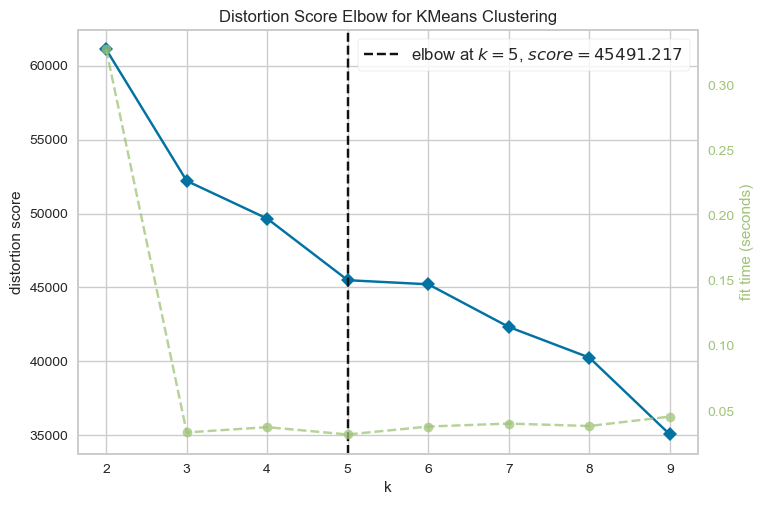

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = KMeans()

visualizer = KElbowVisualizer(estimator=model, k=(2, 10))
visualizer.fit(airbnb_scaled)
visualizer.show()

In [36]:
kmeans = KMeans(n_clusters=5, random_state=69)
kmclus = kmeans.fit(airbnb_scaled)

clusters = kmeans.fit_predict(airbnb_scaled)

airbnb_df['cluster'] = clusters

print(airbnb_df['cluster'].value_counts())

df_desc = airbnb_df.groupby('cluster').mean()
print(df_desc)

cluster
2    1367
0    1061
4     597
1     593
3     138
Name: count, dtype: int64
         host_is_superhost  host_listings_count  host_has_profile_pic  \
cluster                                                                 
0                 0.106503             2.035815              0.999057   
1                 0.198988             2.876897              1.000000   
2                 0.000732             2.310168              0.997074   
3                 0.000000           334.043478              1.000000   
4                 0.879397             3.003350              1.000000   

         host_identity_verified  accommodates  bathrooms  bedrooms      beds  \
cluster                                                                        
0                      0.730443      3.652215   1.278040  1.426956  1.770971   
1                      0.838111      8.671164   2.464587  3.477234  4.799325   
2                      0.722751      3.433797   1.175933  1.276518  1.643745   
3   